# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

In [1]:
#!pip install configparser
#!pip install sqlalchemy
#!pip install pydot
#!pip install sqlalchemy_schemadisplay
#!pip install graphviz

In [2]:
#!pip install eralchemy

In [3]:
#! pip install pandas

In [4]:
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#import pandas as pd
#from eralchemy import render_er

#from sqlalchemy import (MetaData, Table, Column)    
#metadata = MetaData()

# create your own model ....
#d_work = Table(d_work, metadata
    #Column('user_id', Integer(), primary_key=True),
    #Column('username', String(15), nullable=False, unique=True),
#)    
#d_clients = Table(d_clients, metadata
    #Column('order_id', Integer()),
    #Column('user_id', ForeignKey('users.user_id')),
#)
#d_agreement = Table(d_agreement, metadata
    #Column('order_id', Integer()),
    #Column('user_id', ForeignKey('users.user_id')),
#)

# Show ER model from here
#filename = 'mymodel.png'
#render_er(metadata, filename)
#imgplot = plt.imshow(mpimg.imread(filename))
#plt.rcParams["figure.figsize"] = (15,10)
#plt.show()

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [5]:
# подключить необходимые библиотеки
#! pip install psycopg2-binary
# Ваш код здесь
import numpy as np
import pandas as pd
import psycopg2 as pg
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.linear_model import Lasso, Ridge
from sklearn.impute import SimpleImputer

In [6]:
# считать данные

# Ваш код здесь
conn = pg.connect(dbname = 'module_6', user = 'postgres', password = 'postgres', host = 'localhost')
cursor = conn.cursor()

In [7]:
cursor.execute('''
    SELECT table_name
        FROM information_schema.tables
        WHERE table_schema = 'public'
        AND table_type = 'BASE TABLE';
''')
cursor.fetchall()

[('d_work',),
 ('d_clients',),
 ('d_agreement',),
 ('d_last_credit',),
 ('d_job',),
 ('d_loan',),
 ('d_close_loan',),
 ('d_salary',),
 ('d_pens',)]

In [8]:
cursor.execute('''
    SELECT *
    FROM d_work;''')
cursor.fetchall()

[(Decimal('1'), 'работает'),
 (Decimal('2'), 'не работает'),
 (Decimal('3'), 'не известно')]

In [9]:
cursor.execute('''
    SELECT *
    FROM d_clients;''')
cursor.fetchall()

[(Decimal('106805103'),
  Decimal('42'),
  Decimal('1'),
  'Среднее',
  'Не состоял в браке',
  Decimal('1'),
  Decimal('0'),
  Decimal('2'),
  Decimal('1'),
  'Московская область',
  'Московская область',
  'Московская область',
  Decimal('1'),
  Decimal('0')),
 (Decimal('106809308'),
  Decimal('28'),
  Decimal('1'),
  'Среднее специальное',
  'Состою в браке',
  Decimal('1'),
  Decimal('1'),
  Decimal('2'),
  Decimal('1'),
  'Читинская область',
  'Читинская область',
  'Читинская область',
  Decimal('0'),
  Decimal('0')),
 (Decimal('106805867'),
  Decimal('64'),
  Decimal('0'),
  'Среднее специальное',
  'Состою в браке',
  Decimal('2'),
  Decimal('0'),
  Decimal('2'),
  Decimal('2'),
  'Иркутская область',
  'Иркутская область',
  'Иркутская область',
  Decimal('0'),
  Decimal('1')),
 (Decimal('106808779'),
  Decimal('54'),
  Decimal('1'),
  'Среднее специальное',
  'Состою в браке',
  Decimal('0'),
  Decimal('0'),
  Decimal('2'),
  Decimal('1'),
  'Новосибирская область',
  'Новос

In [10]:
cursor.execute('''
    SELECT *
    FROM d_agreement;''')
cursor.fetchall()

[(Decimal('59910150'), Decimal('106804370'), Decimal('0')),
 (Decimal('59910230'), Decimal('106804371'), Decimal('0')),
 (Decimal('59910525'), Decimal('106804372'), Decimal('0')),
 (Decimal('59910803'), Decimal('106804373'), Decimal('0')),
 (Decimal('59911781'), Decimal('106804374'), Decimal('0')),
 (Decimal('59911784'), Decimal('106804375'), Decimal('0')),
 (Decimal('59911832'), Decimal('106804376'), Decimal('0')),
 (Decimal('59912034'), Decimal('106804377'), Decimal('0')),
 (Decimal('59912560'), Decimal('106804378'), Decimal('0')),
 (Decimal('59912659'), Decimal('106804379'), Decimal('0')),
 (Decimal('59912692'), Decimal('106804380'), Decimal('0')),
 (Decimal('59913108'), Decimal('106804381'), Decimal('1')),
 (Decimal('59913134'), Decimal('106804382'), Decimal('1')),
 (Decimal('59913205'), Decimal('106804383'), Decimal('0')),
 (Decimal('59913395'), Decimal('106804384'), Decimal('0')),
 (Decimal('59913542'), Decimal('106804385'), Decimal('1')),
 (Decimal('59913603'), Decimal('10680438

In [11]:
cursor.execute('''
    SELECT *
    FROM d_last_credit;''')
cursor.fetchall()

[(Decimal('8000.0'), Decimal('6'), Decimal('8650.0'), Decimal('106804370')),
 (Decimal('21650.0'), Decimal('6'), Decimal('4000.0'), Decimal('106804371')),
 (Decimal('33126.0'), Decimal('12'), Decimal('4000.0'), Decimal('106804372')),
 (Decimal('8491.82'), Decimal('6'), Decimal('5000.0'), Decimal('106804373')),
 (Decimal('21990.0'), Decimal('12'), Decimal('4000.0'), Decimal('106804374')),
 (Decimal('30615.0'), Decimal('12'), Decimal('3500.0'), Decimal('106804375')),
 (Decimal('10450.0'), Decimal('3'), Decimal('15000.0'), Decimal('106804376')),
 (Decimal('15035.0'), Decimal('10'), Decimal('465.0'), Decimal('106804377')),
 (Decimal('32914.31'),
  Decimal('4'),
  Decimal('29080.92'),
  Decimal('106804378')),
 (Decimal('4440.0'), Decimal('6'), Decimal('540.0'), Decimal('106804379')),
 (Decimal('5160.0'), Decimal('3'), Decimal('600.0'), Decimal('106804380')),
 (Decimal('11751.0'), Decimal('4'), Decimal('8389.0'), Decimal('106804381')),
 (Decimal('11160.0'), Decimal('3'), Decimal('2790.0'), D

In [12]:
cursor.execute('''
    SELECT *
    FROM d_job;''')
cursor.fetchall()

[('Торговля',
  'Рабочий',
  'Вспомогательный техперсонал',
  Decimal('18.0'),
  Decimal('106804370')),
 ('Торговля',
  'Рабочий',
  'Участие в основ. деятельности',
  Decimal('97.0'),
  Decimal('106804371')),
 ('Информационные технологии',
  'Специалист',
  'Участие в основ. деятельности',
  Decimal('84.0'),
  Decimal('106804372')),
 ('Образование',
  'Руководитель среднего звена',
  'Участие в основ. деятельности',
  Decimal('168.0'),
  Decimal('106804373')),
 ('Государственная служба',
  'Специалист',
  'Участие в основ. деятельности',
  Decimal('101.0'),
  Decimal('106804374')),
 ('Торговля',
  'Специалист',
  'Адм-хоз. и трансп. службы',
  Decimal('40.0'),
  Decimal('106804375')),
 ('Другие сферы',
  'Специалист',
  'Участие в основ. деятельности',
  Decimal('6.0'),
  Decimal('106804376')),
 ('Сельское хозяйство',
  'Рабочий',
  'Участие в основ. деятельности',
  Decimal('6.0'),
  Decimal('106804377')),
 ('Здравоохранение',
  'Руководитель высшего звена',
  'Участие в основ. деяте

In [13]:
cursor.execute('''
    SELECT *
    FROM d_loan;''')
cursor.fetchall()

[(Decimal('1753790658'), Decimal('106804370')),
 (Decimal('1753790659'), Decimal('106804371')),
 (Decimal('1753790660'), Decimal('106804372')),
 (Decimal('1753790661'), Decimal('106804372')),
 (Decimal('1753790662'), Decimal('106804373')),
 (Decimal('1753790663'), Decimal('106804374')),
 (Decimal('1753790664'), Decimal('106804374')),
 (Decimal('1753790665'), Decimal('106804375')),
 (Decimal('1753790666'), Decimal('106804375')),
 (Decimal('1753790667'), Decimal('106804376')),
 (Decimal('1753790668'), Decimal('106804376')),
 (Decimal('1753790669'), Decimal('106804377')),
 (Decimal('1753790670'), Decimal('106804377')),
 (Decimal('1753790671'), Decimal('106804378')),
 (Decimal('1753790672'), Decimal('106804379')),
 (Decimal('1753790673'), Decimal('106804380')),
 (Decimal('1753790674'), Decimal('106804381')),
 (Decimal('1753790675'), Decimal('106804381')),
 (Decimal('1753790676'), Decimal('106804382')),
 (Decimal('1753790677'), Decimal('106804383')),
 (Decimal('1753790678'), Decimal('106804

In [14]:
cursor.execute('''
    SELECT *
    FROM d_close_loan;''')
cursor.fetchall()

[(Decimal('1753790658'), Decimal('1')),
 (Decimal('1753790659'), Decimal('1')),
 (Decimal('1753790660'), Decimal('1')),
 (Decimal('1753790661'), Decimal('0')),
 (Decimal('1753790662'), Decimal('1')),
 (Decimal('1753790663'), Decimal('1')),
 (Decimal('1753790664'), Decimal('0')),
 (Decimal('1753790665'), Decimal('1')),
 (Decimal('1753790666'), Decimal('0')),
 (Decimal('1753790667'), Decimal('1')),
 (Decimal('1753790668'), Decimal('1')),
 (Decimal('1753790669'), Decimal('1')),
 (Decimal('1753790670'), Decimal('0')),
 (Decimal('1753790671'), Decimal('1')),
 (Decimal('1753790672'), Decimal('1')),
 (Decimal('1753790673'), Decimal('1')),
 (Decimal('1753790674'), Decimal('0')),
 (Decimal('1753790675'), Decimal('1')),
 (Decimal('1753790676'), Decimal('1')),
 (Decimal('1753790677'), Decimal('1')),
 (Decimal('1753790678'), Decimal('0')),
 (Decimal('1753790679'), Decimal('1')),
 (Decimal('1753790680'), Decimal('1')),
 (Decimal('1753790681'), Decimal('1')),
 (Decimal('1753790682'), Decimal('1')),


In [15]:
cursor.execute('''
    SELECT *
    FROM d_salary;''')
cursor.fetchall()

[('от 20000 до 50000 руб.', Decimal('20000.0'), Decimal('106809321')),
 ('от 20000 до 50000 руб.', Decimal('14000.0'), Decimal('106815561')),
 ('от 10000 до 20000 руб.', Decimal('15000.0'), Decimal('106811521')),
 ('от 20000 до 50000 руб.', Decimal('20000.0'), Decimal('106811252')),
 ('от 20000 до 50000 руб.', Decimal('25000.0'), Decimal('106808620')),
 ('от 10000 до 20000 руб.', Decimal('10000.0'), Decimal('106807688')),
 ('от 20000 до 50000 руб.', Decimal('14000.0'), Decimal('106812199')),
 ('от 20000 до 50000 руб.', Decimal('7000.0'), Decimal('106808036')),
 ('от 20000 до 50000 руб.', Decimal('30000.0'), Decimal('106818096')),
 ('от 20000 до 50000 руб.', Decimal('17000.0'), Decimal('106818904')),
 ('от 10000 до 20000 руб.', Decimal('6670.0'), Decimal('106805328')),
 ('от 5000 до 10000 руб.', Decimal('7000.0'), Decimal('106814361')),
 ('от 20000 до 50000 руб.', Decimal('10000.0'), Decimal('106813748')),
 ('от 5000 до 10000 руб.', Decimal('6000.0'), Decimal('106804701')),
 ('от 10000 

In [16]:
cursor.execute('''
    SELECT *
    FROM d_pens;''')
cursor.fetchall()

[(Decimal('1'), 'пенсионер'), (Decimal('2'), 'не пенсионер')]

In [17]:
d_work = '''
    SELECT *
    FROM d_work;'''
d_work_df = pd.read_sql(d_work, conn)
d_work_df.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_12100\1183770968.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  d_work_df = pd.read_sql(d_work, conn)


,id,comment
0,1.0,работает
1,2.0,не работает
2,3.0,не известно


In [18]:
d_clients = '''
    SELECT *
    FROM d_clients;'''
d_clients_df = pd.read_sql(d_clients, conn)
d_clients_df.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_12100\1226067837.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  d_clients_df = pd.read_sql(d_clients, conn)


,id,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto
0,106805103.0,42.0,1.0,Среднее,Не состоял в браке,1.0,0.0,2.0,1.0,Московская область,Московская область,Московская область,1.0,0.0
1,106809308.0,28.0,1.0,Среднее специальное,Состою в браке,1.0,1.0,2.0,1.0,Читинская область,Читинская область,Читинская область,0.0,0.0
2,106805867.0,64.0,0.0,Среднее специальное,Состою в браке,2.0,0.0,2.0,2.0,Иркутская область,Иркутская область,Иркутская область,0.0,1.0
3,106808779.0,54.0,1.0,Среднее специальное,Состою в браке,0.0,0.0,2.0,1.0,Новосибирская область,Новосибирская область,Новосибирская область,1.0,1.0
4,106814289.0,26.0,0.0,Среднее специальное,Состою в браке,1.0,1.0,2.0,1.0,Красноярский край,Красноярский край,Красноярский край,1.0,0.0


In [19]:
d_agreement = '''
    SELECT *
    FROM d_agreement;'''
d_agreement_df = pd.read_sql(d_agreement, conn)
d_agreement_df.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_12100\1374835383.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  d_agreement_df = pd.read_sql(d_agreement, conn)


,agreement_rk,id_client,target
0,59910150.0,106804370.0,0.0
1,59910230.0,106804371.0,0.0
2,59910525.0,106804372.0,0.0
3,59910803.0,106804373.0,0.0
4,59911781.0,106804374.0,0.0


In [20]:
d_last_credit = '''
    SELECT *
    FROM d_last_credit;'''
d_last_credit_df = pd.read_sql(d_last_credit, conn)
d_last_credit_df.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_12100\1363664455.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  d_last_credit_df = pd.read_sql(d_last_credit, conn)


,credit,term,fst_payment,id_client
0,8000.00,6.0,8650.0,106804370.0
1,21650.00,6.0,4000.0,106804371.0
2,33126.00,12.0,4000.0,106804372.0
3,8491.82,6.0,5000.0,106804373.0
4,21990.00,12.0,4000.0,106804374.0


In [21]:
d_job = '''
    SELECT *
    FROM d_job;'''
d_job_df = pd.read_sql(d_job, conn)
d_job_df.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_12100\3534287480.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  d_job_df = pd.read_sql(d_job, conn)


,gen_industry,gen_title,job_dir,work_time,id_client
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370.0
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371.0
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372.0
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373.0
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374.0


In [22]:
d_loan = '''
    SELECT *
    FROM d_loan;'''
d_loan_df = pd.read_sql(d_loan, conn)
d_loan_df.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_12100\2616605781.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  d_loan_df = pd.read_sql(d_loan, conn)


,id_loan,id_client
0,1.753791e+09,106804370.0
1,1.753791e+09,106804371.0
2,1.753791e+09,106804372.0
3,1.753791e+09,106804372.0
4,1.753791e+09,106804373.0


In [23]:
d_close_loan = '''
    SELECT *
    FROM d_close_loan;'''
d_close_loan_df = pd.read_sql(d_close_loan, conn)
d_close_loan_df.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_12100\2316939118.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  d_close_loan_df = pd.read_sql(d_close_loan, conn)


,id_loan,closed_fl
0,1.753791e+09,1.0
1,1.753791e+09,1.0
2,1.753791e+09,1.0
3,1.753791e+09,0.0
4,1.753791e+09,1.0


In [24]:
d_salary = '''
    SELECT *
    FROM d_salary;'''
d_salary_df = pd.read_sql(d_salary, conn)
d_salary_df.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_12100\4137022947.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  d_salary_df = pd.read_sql(d_salary, conn)


,family_income,personal_income,id_client
0,от 20000 до 50000 руб.,20000.0,106809321.0
1,от 20000 до 50000 руб.,14000.0,106815561.0
2,от 10000 до 20000 руб.,15000.0,106811521.0
3,от 20000 до 50000 руб.,20000.0,106811252.0
4,от 20000 до 50000 руб.,25000.0,106808620.0


In [25]:
d_pens = '''
    SELECT *
    FROM d_pens;'''
d_pens_df = pd.read_sql(d_pens, conn)
d_pens_df.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_12100\3257559297.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  d_pens_df = pd.read_sql(d_pens, conn)


,id,comment
0,1.0,пенсионер
1,2.0,не пенсионер


In [26]:
df_loan_merged = d_loan_df.merge(d_close_loan_df, on = 'id_loan')
df_loan_merged.head()

,id_loan,id_client,closed_fl
0,1.753791e+09,106804370.0,1.0
1,1.753791e+09,106804371.0,1.0
2,1.753791e+09,106804372.0,1.0
3,1.753791e+09,106804372.0,0.0
4,1.753791e+09,106804373.0,1.0


In [27]:
df1 = df_loan_merged.merge(d_salary_df, on = 'id_client')
df1.head()

,id_loan,id_client,closed_fl,family_income,personal_income
0,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0
1,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0
2,1.753791e+09,106804371.0,1.0,от 10000 до 20000 руб.,12000.0
3,1.753791e+09,106804372.0,1.0,от 10000 до 20000 руб.,9000.0
4,1.753791e+09,106804372.0,0.0,от 10000 до 20000 руб.,9000.0


In [28]:
df2 = df1.merge(d_job_df, on = 'id_client')
df2.head()

,id_loan,id_client,closed_fl,family_income,personal_income,gen_industry,gen_title,job_dir,work_time
0,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0
1,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0
2,1.753791e+09,106804371.0,1.0,от 10000 до 20000 руб.,12000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0
3,1.753791e+09,106804372.0,1.0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0
4,1.753791e+09,106804372.0,0.0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0


In [29]:
df3 = df2.merge(d_last_credit_df, on = 'id_client')
df3.head()

,id_loan,id_client,closed_fl,family_income,personal_income,gen_industry,gen_title,job_dir,work_time,credit,term,fst_payment
0,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,8000.0,6.0,8650.0
1,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,8000.0,6.0,8650.0
2,1.753791e+09,106804371.0,1.0,от 10000 до 20000 руб.,12000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0,21650.0,6.0,4000.0
3,1.753791e+09,106804372.0,1.0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,33126.0,12.0,4000.0
4,1.753791e+09,106804372.0,0.0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,33126.0,12.0,4000.0


In [30]:
df4 = df3.merge(d_agreement_df, on = 'id_client')
df4.head()

,id_loan,id_client,closed_fl,family_income,personal_income,gen_industry,gen_title,job_dir,work_time,credit,term,fst_payment,agreement_rk,target
0,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,8000.0,6.0,8650.0,59910150.0,0.0
1,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,8000.0,6.0,8650.0,59910150.0,0.0
2,1.753791e+09,106804371.0,1.0,от 10000 до 20000 руб.,12000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0,21650.0,6.0,4000.0,59910230.0,0.0
3,1.753791e+09,106804372.0,1.0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,33126.0,12.0,4000.0,59910525.0,0.0
4,1.753791e+09,106804372.0,0.0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,33126.0,12.0,4000.0,59910525.0,0.0


In [31]:
d_clients_df.rename(columns = {'id': 'id_client'}, inplace = True)
d_clients_df.head()

,id_client,age,gender,education,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto
0,106805103.0,42.0,1.0,Среднее,Не состоял в браке,1.0,0.0,2.0,1.0,Московская область,Московская область,Московская область,1.0,0.0
1,106809308.0,28.0,1.0,Среднее специальное,Состою в браке,1.0,1.0,2.0,1.0,Читинская область,Читинская область,Читинская область,0.0,0.0
2,106805867.0,64.0,0.0,Среднее специальное,Состою в браке,2.0,0.0,2.0,2.0,Иркутская область,Иркутская область,Иркутская область,0.0,1.0
3,106808779.0,54.0,1.0,Среднее специальное,Состою в браке,0.0,0.0,2.0,1.0,Новосибирская область,Новосибирская область,Новосибирская область,1.0,1.0
4,106814289.0,26.0,0.0,Среднее специальное,Состою в браке,1.0,1.0,2.0,1.0,Красноярский край,Красноярский край,Красноярский край,1.0,0.0


In [32]:
df = df4.merge(d_clients_df, on = 'id_client')
df.head()

,id_loan,id_client,closed_fl,family_income,personal_income,gen_industry,gen_title,job_dir,work_time,credit,...,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto
0,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,8000.0,...,Состою в браке,2.0,1.0,2.0,1.0,Оренбургская область,Оренбургская область,Оренбургская область,0.0,0.0
1,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,8000.0,...,Состою в браке,2.0,1.0,2.0,1.0,Оренбургская область,Оренбургская область,Оренбургская область,0.0,0.0
2,1.753791e+09,106804371.0,1.0,от 10000 до 20000 руб.,12000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0,21650.0,...,Состою в браке,3.0,3.0,2.0,1.0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0.0,0.0
3,1.753791e+09,106804372.0,1.0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,33126.0,...,Состою в браке,4.0,0.0,2.0,1.0,Иркутская область,Иркутская область,Иркутская область,0.0,0.0
4,1.753791e+09,106804372.0,0.0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,33126.0,...,Состою в браке,4.0,0.0,2.0,1.0,Иркутская область,Иркутская область,Иркутская область,0.0,0.0


In [33]:
df.columns

Index(['id_loan', 'id_client', 'closed_fl', 'family_income', 'personal_income',
       'gen_industry', 'gen_title', 'job_dir', 'work_time', 'credit', 'term',
       'fst_payment', 'agreement_rk', 'target', 'age', 'gender', 'education',
       'marital_status', 'child_total', 'dependants', 'socstatus_work_fl',
       'socstatus_pens_fl', 'reg_address_province', 'fact_address_province',
       'postal_address_province', 'fl_presence_fl', 'own_auto'],
      dtype='object')

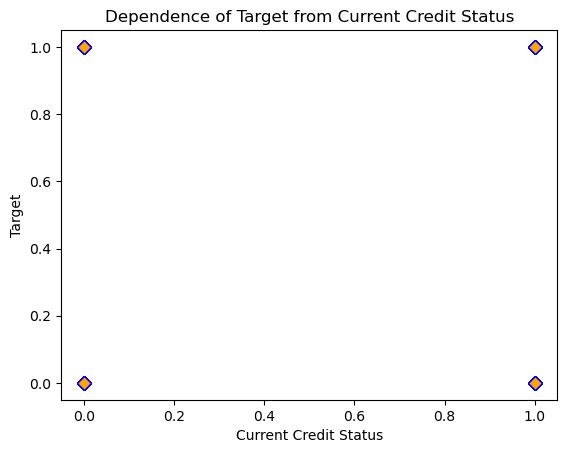

In [34]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы

# Ваш код здесь
fig, ax = plt.subplots()

ax.plot(df['closed_fl'], df['target'], color='blue', marker='D', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'orange')
ax.set_title('Dependence of Target from Current Credit Status')
ax.set_xlabel('Current Credit Status')
ax.set_ylabel('Target')
plt.show()

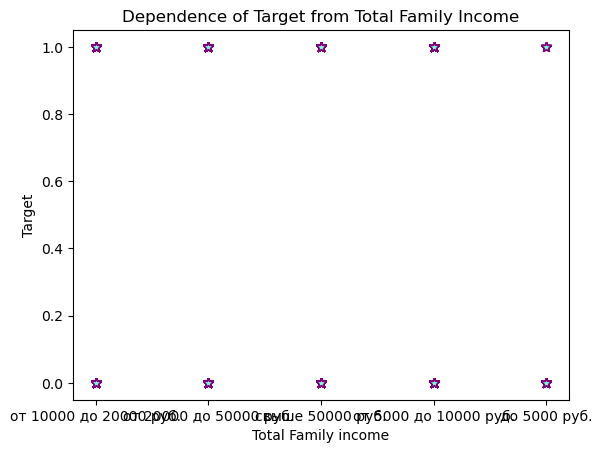

In [35]:
fig, ax = plt.subplots()

ax.plot(df['family_income'], df['target'], color='purple', marker='*', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'aquamarine')
ax.set_title('Dependence of Target from Total Family Income')
ax.set_xlabel('Total Family income')
ax.set_ylabel('Target')
plt.show()

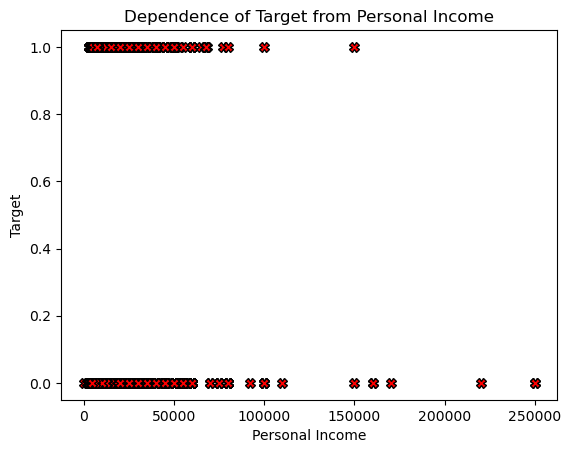

In [36]:
fig, ax = plt.subplots()

ax.plot(df['personal_income'], df['target'], color='black', marker='X', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'red')
ax.set_title('Dependence of Target from Personal Income')
ax.set_xlabel('Personal Income')
ax.set_ylabel('Target')
plt.show()

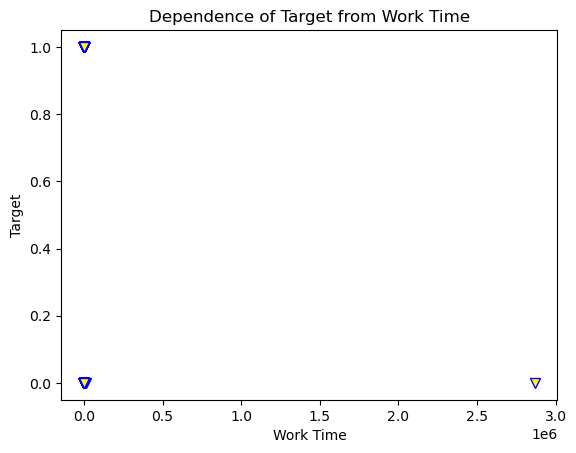

In [37]:
fig, ax = plt.subplots()

ax.plot(df['work_time'], df['target'], color='blue', marker='v', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'yellow')
ax.set_title('Dependence of Target from Work Time')
ax.set_xlabel('Work Time')
ax.set_ylabel('Target')
plt.show()

Последний график является очень странным. Если обратить внимание на шкалу, то можно увидеть, что значение величины рабочего времени дано в миллионах часах. Отсюда можно сделать вывод, что имеется некоторый выброс значения. Проверим это предположение получив полное описание численных значений колонки work_time

In [38]:
df['work_time'].describe()

count    1.972700e+04
mean     2.327345e+02
std      2.041913e+04
min      1.000000e+00
25%      2.400000e+01
50%      5.000000e+01
75%      1.200000e+02
max      2.867959e+06
Name: work_time, dtype: float64

Как можно заметить максимальное число представляет собой значение 2867959 часов, что не может быть в качетсве рабочего времени. Создадим функцию для вывода граничных нормальных значений для рабочего времени, используя интерквартильный размах.

In [39]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries
boundaries = calculate_outliers(df['work_time'])
boundaries

(-120.0, 264.0)

Определим количество вбросов, которые не входят в рассчитанные границы значений рабочего времени

In [40]:
is_outlier = ((df['work_time'] < boundaries[0]) | (df['work_time'] > boundaries[1]))
print('Количество выбросов в рабочем времени', is_outlier.sum())

#df.loc[is_outlier, 'work_time'] = int(boundaries[0])

Количество выбросов в рабочем времени 1186


Посмотрим на описательные характеристики рабочего времени.

In [41]:
df['work_time'].describe().apply(lambda x: f"{x:0.3f}")

count      19727.000
mean         232.734
std        20419.129
min            1.000
25%           24.000
50%           50.000
75%          120.000
max      2867959.000
Name: work_time, dtype: object

Удалим строки из датасета, в которых имеются выбросы.

In [42]:
df = df[~(is_outlier)]
df.head()

,id_loan,id_client,closed_fl,family_income,personal_income,gen_industry,gen_title,job_dir,work_time,credit,...,marital_status,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,reg_address_province,fact_address_province,postal_address_province,fl_presence_fl,own_auto
0,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,8000.0,...,Состою в браке,2.0,1.0,2.0,1.0,Оренбургская область,Оренбургская область,Оренбургская область,0.0,0.0
1,1.753791e+09,106804370.0,1.0,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,8000.0,...,Состою в браке,2.0,1.0,2.0,1.0,Оренбургская область,Оренбургская область,Оренбургская область,0.0,0.0
2,1.753791e+09,106804371.0,1.0,от 10000 до 20000 руб.,12000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0,21650.0,...,Состою в браке,3.0,3.0,2.0,1.0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0.0,0.0
3,1.753791e+09,106804372.0,1.0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,33126.0,...,Состою в браке,4.0,0.0,2.0,1.0,Иркутская область,Иркутская область,Иркутская область,0.0,0.0
4,1.753791e+09,106804372.0,0.0,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,33126.0,...,Состою в браке,4.0,0.0,2.0,1.0,Иркутская область,Иркутская область,Иркутская область,0.0,0.0


In [43]:
df['work_time'].describe().apply(lambda x: f"{x:0.3f}")

count    18541.000
mean        69.259
std         62.735
min          1.000
25%         24.000
50%         48.000
75%         96.000
max        264.000
Name: work_time, dtype: object

In [44]:
is_outlier = ((df['work_time'] < boundaries[0]) | (df['work_time'] > boundaries[1]))
print('Количество выбросов в рабочем времени', is_outlier.sum())

Количество выбросов в рабочем времени 0


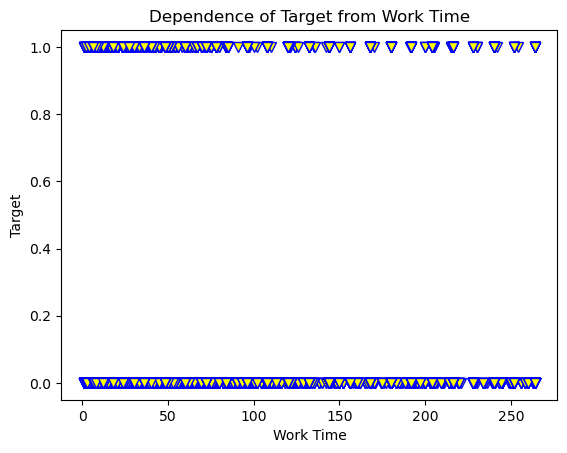

In [45]:
fig, ax = plt.subplots()

ax.plot(df['work_time'], df['target'], color='blue', marker='v', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'yellow')
ax.set_title('Dependence of Target from Work Time')
ax.set_xlabel('Work Time')
ax.set_ylabel('Target')
plt.show()

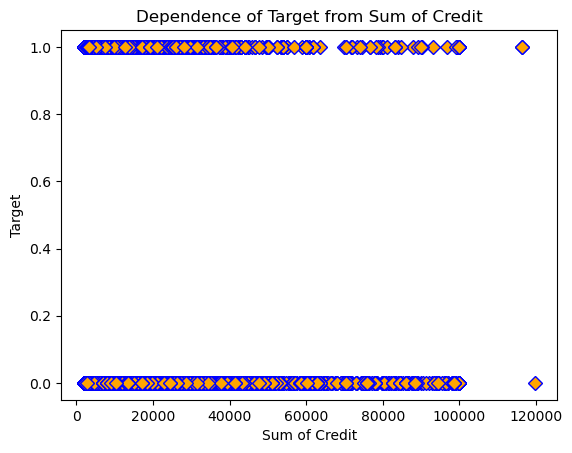

In [46]:
fig, ax = plt.subplots()

ax.plot(df['credit'], df['target'], color='blue', marker='D', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'orange')
ax.set_title('Dependence of Target from Sum of Credit')
ax.set_xlabel('Sum of Credit')
ax.set_ylabel('Target')
plt.show()

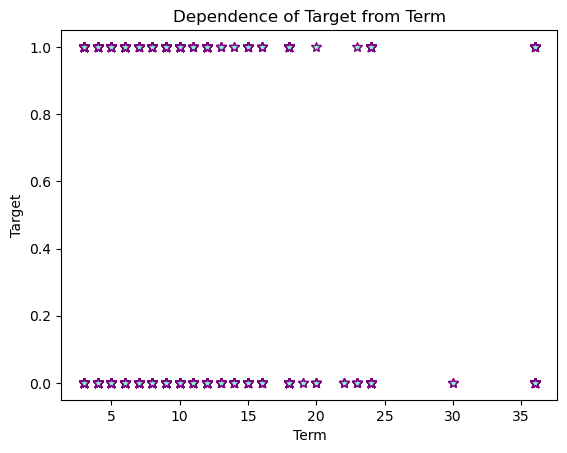

In [47]:
fig, ax = plt.subplots()

ax.plot(df['term'], df['target'], color='purple', marker='*', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'aquamarine')
ax.set_title('Dependence of Target from Term')
ax.set_xlabel('Term')
ax.set_ylabel('Target')
plt.show()

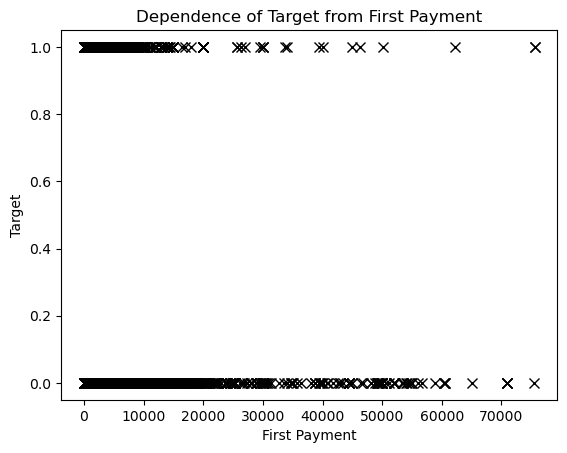

In [48]:
fig, ax = plt.subplots()

ax.plot(df['fst_payment'], df['target'], color='black', marker='x', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'red')
ax.set_title('Dependence of Target from First Payment')
ax.set_xlabel('First Payment')
ax.set_ylabel('Target')
plt.show()

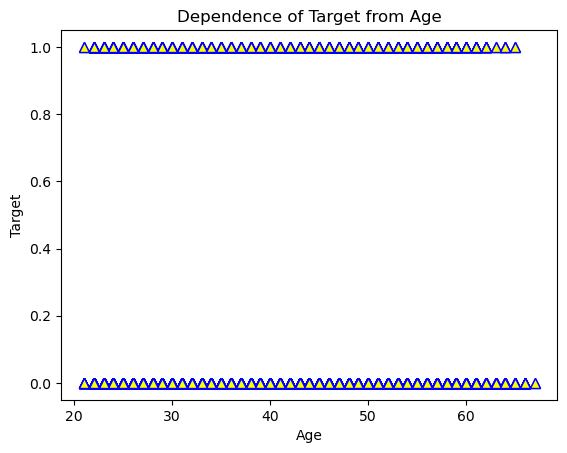

In [49]:
fig, ax = plt.subplots()

ax.plot(df['age'], df['target'], color='blue', marker='^', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'yellow')
ax.set_title('Dependence of Target from Age')
ax.set_xlabel('Age')
ax.set_ylabel('Target')
plt.show()

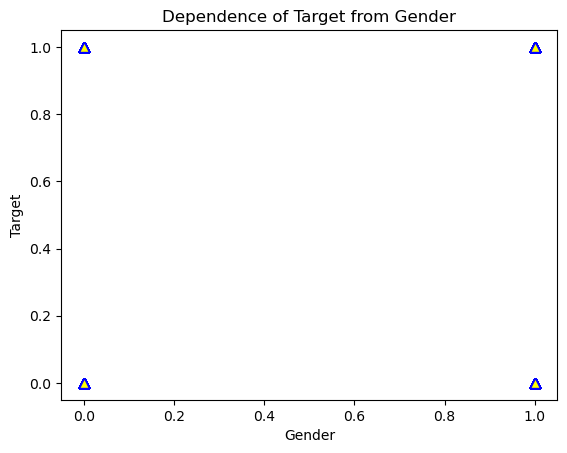

In [50]:
fig, ax = plt.subplots()

ax.plot(df['gender'], df['target'], color='blue', marker='^', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'yellow')
ax.set_title('Dependence of Target from Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Target')
plt.show()

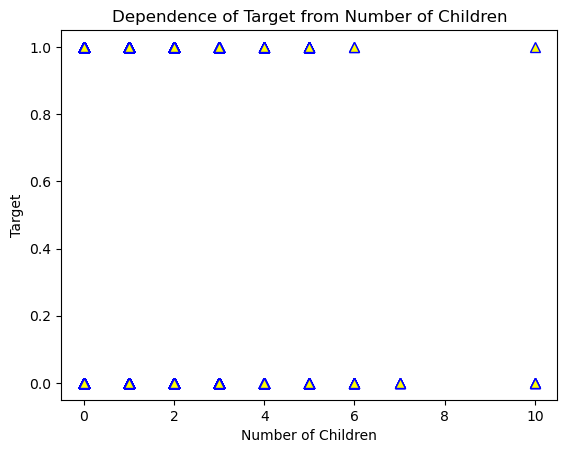

In [51]:
fig, ax = plt.subplots()

ax.plot(df['child_total'], df['target'], color='blue', marker='^', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'yellow')
ax.set_title('Dependence of Target from Number of Children')
ax.set_xlabel('Number of Children')
ax.set_ylabel('Target')
plt.show()

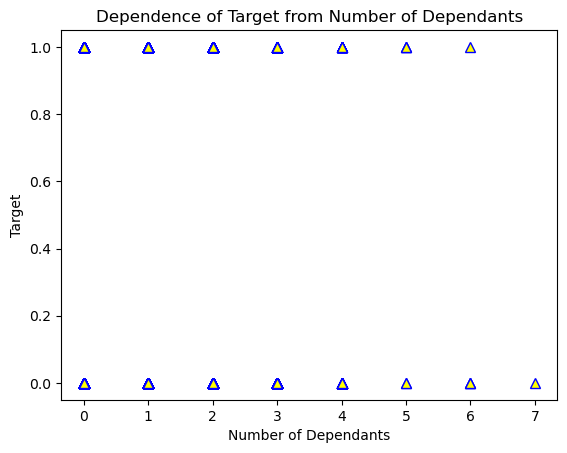

In [52]:
fig, ax = plt.subplots()

ax.plot(df['dependants'], df['target'], color='blue', marker='^', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'yellow')
ax.set_title('Dependence of Target from Number of Dependants')
ax.set_xlabel('Number of Dependants')
ax.set_ylabel('Target')
plt.show()

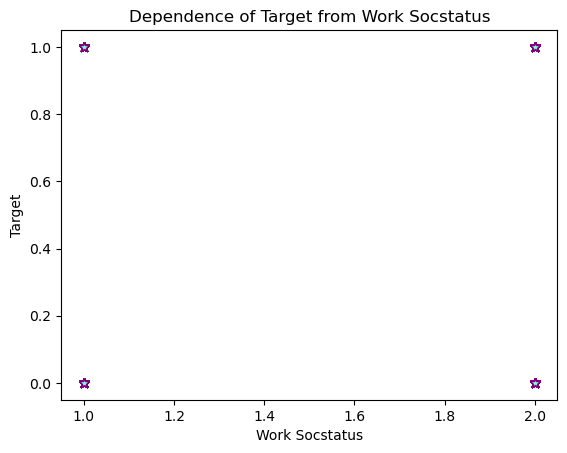

In [53]:
fig, ax = plt.subplots()

ax.plot(df['socstatus_work_fl'], df['target'], color='purple', marker='*', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'aquamarine')
ax.set_title('Dependence of Target from Work Socstatus')
ax.set_xlabel('Work Socstatus')
ax.set_ylabel('Target')
plt.show()

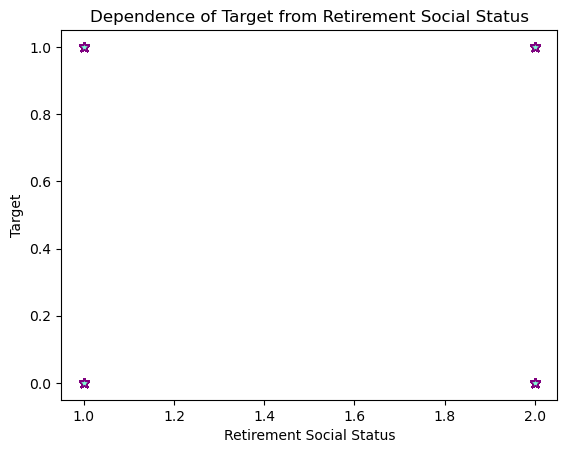

In [54]:
fig, ax = plt.subplots()

ax.plot(df['socstatus_pens_fl'], df['target'], color='purple', marker='*', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'aquamarine')
ax.set_title('Dependence of Target from Retirement Social Status')
ax.set_xlabel('Retirement Social Status')
ax.set_ylabel('Target')
plt.show()

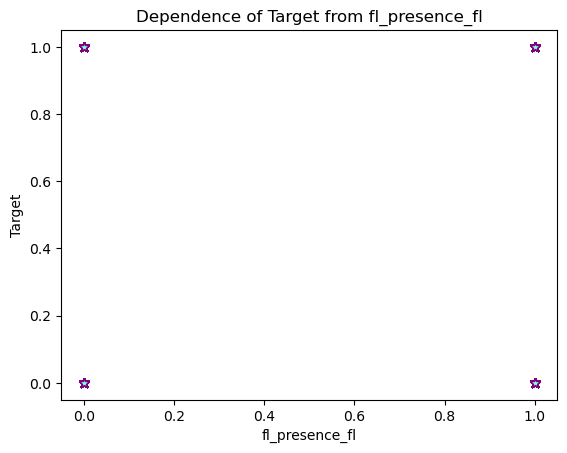

In [55]:
fig, ax = plt.subplots()

ax.plot(df['fl_presence_fl'], df['target'], color='purple', marker='*', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'aquamarine')
ax.set_title('Dependence of Target from fl_presence_fl')
ax.set_xlabel('fl_presence_fl')
ax.set_ylabel('Target')
plt.show()

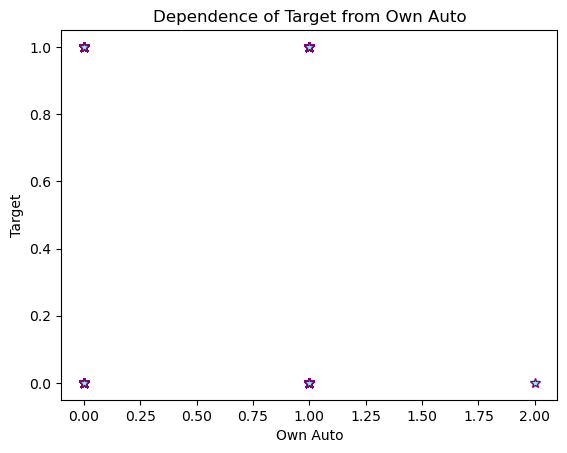

In [56]:
fig, ax = plt.subplots()

ax.plot(df['own_auto'], df['target'], color='purple', marker='*', linestyle='None', linewidth=0,
        markersize=7, markerfacecolor = 'aquamarine')
ax.set_title('Dependence of Target from Own Auto')
ax.set_xlabel('Own Auto')
ax.set_ylabel('Target')
plt.show()

['id_loan', 'id_client', 'closed_fl', 'family_income', 'personal_income',
       'gen_industry', 'gen_title', 'job_dir', 'work_time', 'credit', 'term',
       'fst_payment', 'agreement_rk', 'target', 'age', 'gender', 'education',
       'marital_status', 'child_total', 'dependants', 'socstatus_work_fl',
       'socstatus_pens_fl', 'reg_address_province', 'fact_address_province',
       'postal_address_province', 'fl_presence_fl', 'own_auto'],
      dtype='object'

In [57]:
add_df_1 = pd.DataFrame()
add_df_1 = pd.get_dummies(df[['family_income', 'gen_industry', 'gen_title', 'job_dir', 'education', 'marital_status', 
                              'reg_address_province', 'fact_address_province', 'postal_address_province']], dtype=float)
add_df_1['id_client'] = df['id_client']
df = pd.merge(left = df, right = add_df_1, on = 'id_client', how = 'inner')
columns_for_drop_1 = ['family_income', 'gen_industry', 'gen_title', 'job_dir', 'education', 'marital_status', 'reg_address_province', 
                      'fact_address_province', 'postal_address_province']
df = df.drop(columns_for_drop_1, axis=1)
df.columns

Index(['id_loan', 'id_client', 'closed_fl', 'personal_income', 'work_time',
       'credit', 'term', 'fst_payment', 'agreement_rk', 'target',
       ...
       'postal_address_province_Хабаровский край',
       'postal_address_province_Хакасия',
       'postal_address_province_Ханты-Мансийский АО',
       'postal_address_province_Челябинская область',
       'postal_address_province_Читинская область',
       'postal_address_province_Чувашия',
       'postal_address_province_Эвенкийский АО',
       'postal_address_province_Якутия',
       'postal_address_province_Ямало-Ненецкий АО',
       'postal_address_province_Ярославская область'],
      dtype='object', length=330)

In [58]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [59]:
df.dropna()

,id_loan,id_client,closed_fl,personal_income,work_time,credit,term,fst_payment,agreement_rk,target,...,postal_address_province_Хабаровский край,postal_address_province_Хакасия,postal_address_province_Ханты-Мансийский АО,postal_address_province_Челябинская область,postal_address_province_Читинская область,postal_address_province_Чувашия,postal_address_province_Эвенкийский АО,postal_address_province_Якутия,postal_address_province_Ямало-Ненецкий АО,postal_address_province_Ярославская область
0,1.753791e+09,106804370.0,1.0,5000.0,18.0,8000.0,6.0,8650.0,59910150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.753791e+09,106804370.0,1.0,5000.0,18.0,8000.0,6.0,8650.0,59910150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.753791e+09,106804370.0,1.0,5000.0,18.0,8000.0,6.0,8650.0,59910150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.753791e+09,106804370.0,1.0,5000.0,18.0,8000.0,6.0,8650.0,59910150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.753791e+09,106804371.0,1.0,12000.0,97.0,21650.0,6.0,4000.0,59910230.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39085,1.753812e+09,106819588.0,1.0,12000.0,48.0,13450.0,10.0,1500.0,75291424.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39086,1.753812e+09,106819588.0,1.0,12000.0,48.0,13450.0,10.0,1500.0,75291424.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39087,1.753812e+09,106819589.0,0.0,10000.0,156.0,8991.0,6.0,4000.0,75291888.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39088,1.753812e+09,106819590.0,0.0,6000.0,48.0,2700.0,6.0,800.0,75291923.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df['target'].describe().apply(lambda x: f"{x:0.3f}")

count    39091.000
mean         0.112
std          0.316
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          1.000
Name: target, dtype: object

In [61]:
# раздедлите на обучающую и тестовую выборки

# Ваш код здесь
x = df.drop(['target'], axis = 1)
y = df['target']
x = imputer.fit_transform(x)
#y = imputer.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [62]:
# обучите модель методом ближайших соседей
knn = KNeighborsClassifier(n_neighbors=3)
# Ваш код здесь

In [63]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
print('Прогнозы для обучающей выборки:', knn.predict(x_train))

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid

Прогнозы для обучающей выборки: [1. 0. 0. ... 0. 0. 0.]


In [65]:
print('Точность для обучающей выборки:', knn.score(x_train, y_train))
print('Точность для тестовой выборки:', knn.score(x_test, y_test))

Точность для обучающей выборки: 0.9631619339984651
Точность для тестовой выборки: 0.943468622100955


In [66]:
# проверьте качество модели с помощью F-мера

# Ваш код здесь
A = confusion_matrix(y_test, knn.predict(x_test))
A

array([[10166,   245],
       [  418,   899]], dtype=int64)

In [67]:
TP = A[0][0]
TP

10166

In [68]:
FP = A[0][1]
FP

245

In [69]:
FN = A[1][0]
FN

418

In [70]:
TN = A[1][1]
TN

899

In [71]:
Precision = TP / (TP + FP)

In [72]:
Recall = TP / (TP + FN)

In [73]:
F_mera = 2 * (Precision * Recall) / (Precision + Recall)
print('Для тестовой выборки F-мера равна:', F_mera)

Для тестовой выборки F-мера равна: 0.9684210526315788


In [74]:
# проверьте качество модели с помощью матрицы сопряжённостей

# Ваш код здесь
print('Матрица сопряженностей для обучающей выборки', confusion_matrix(y_train, knn.predict(x_train)))

Матрица сопряженностей для обучающей выборки [[24032   254]
 [  754  2323]]


In [75]:
print('Матрица сопряженностей для тестовой выборки', confusion_matrix(y_test, knn.predict(x_test)))

Матрица сопряженностей для тестовой выборки [[10166   245]
 [  418   899]]


    # сделайте вывод о работе модели

    # Ваш текст здесь
    
    Из анализа полученных значений точности прогнозирования score, матрицы сопряженностей confusion_matrix и величины F-measure можно констатировать, что получившаяся модель прогнозирует целевую функцию с высокой точностью, при этом переобучение не происходит. В ходе выполнения работы необходимо было тщательно провести анализ получившегося датасета. В ходе анализа было выявлено наличие выбросов в рабочем времени, которые могли приводить к искажения предсказываемых значений получившейся модели.
    В целом для представленных данных, где значениями целевой функции являлись только два значения, метод ближайших соседей показал очень хороший результат.